# BL40A2010 Introduction to IoT-Based Systems

## Assignment 2, 17.01.2024

### Author:Jesse Peltola

**(1) Give one example of each of the following type of data.**

Answer:

(a) Analog: A violin
	
(b) Digital: DVD

(c) Primary: The electricy consumption in my house 

(d) Secondary (i.e., lack of data that is informative): There is only few items in my refrigerator so it indicates indirectly that I need to resupply food. 

(e) Metadata: The timestamp of when the photo was taken

(f) Environmental: There is snow outside so it has to be below 0 celcius degree. 

**(2) Write one example when the same structured data can be classified as (a) information, (b) redundancy and (c) not interpretable.**

Answer: The same structured data can be e.g. the air temperature in one year including temperature, year, month, day and time. This can be classified as information. However, there can be duplicated information which can be classified as redundancy. When data has something cryptic codes e.g. the air temperature is represented in bit code so it is difficult/impossible to interpret without additional context. 

**(3) Photo-voltaic generation converts the sun's radiation into usable electricity. In this task, you will get the *direct solar radiation* with 1 minute time interval from the *Radiation observations*  at [FMI](http://en.ilmatieteenlaitos.fi/download-observations#!/). Plot radiation profile of three different days so that one must be in March, other in July and the last in December (regardless of the year). What measuring station was used? Compare the solar radiation in those 3 days and provide *information* about the potential of solar generation in those days. You can also select the measuring station (but write it in the answer).**

*Hint:* Code like in the tutorial notebook.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np 

# Read the data
radiation_1 = pd.read_csv("sodankyla_20230315.csv", dayfirst=True, sep=",", header=0, 
                               decimal=b".", parse_dates=[[0,1,2,3]], usecols=[0,1,2,3,4])

radiation_2 = pd.read_csv("sodankyla_20230719.csv", dayfirst=True, sep=",", header=0, 
                               decimal=b".", parse_dates=[[0,1,2,3]], usecols=[0,1,2,3,4])

radiation_3 = pd.read_csv("sodankyla_20231224.csv", dayfirst=True, sep=",", header=0, 
                               decimal=b".", parse_dates=[[0,1,2,3]], usecols=[0,1,2,3,4])

display(radiation_1.head())
display(radiation_2.head())
display(radiation_3.head())




# Set the index to the datetime column
radiation_1.set_index("Year_Month_Day_Time [UTC]", inplace=True)
radiation_2.set_index("Year_Month_Day_Time [UTC]", inplace=True)
radiation_3.set_index("Year_Month_Day_Time [UTC]", inplace=True)




C:\Users\jesse\AppData\Local\Temp\ipykernel_23452\349282801.py:7: UserWarning: Parsing dates in %Y %m %d %H:%M format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  radiation_1 = pd.read_csv("sodankyla_20230315.csv", dayfirst=True, sep=",", header=0,
C:\Users\jesse\AppData\Local\Temp\ipykernel_23452\349282801.py:10: UserWarning: Parsing dates in %Y %m %d %H:%M format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  radiation_2 = pd.read_csv("sodankyla_20230719.csv", dayfirst=True, sep=",", header=0,
C:\Users\jesse\AppData\Local\Temp\ipykernel_23452\349282801.py:13: UserWarning: Parsing dates in %Y %m %d %H:%M format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  radiation_3 = pd.read_csv("sodankyla_20231224.csv", dayfirst=True, sep=",", header=0,


,Year_Month_Day_Time [UTC],Direct solar radiation [W/m2]
0,2023-03-15 00:00:00,0.9
1,2023-03-15 00:01:00,1.0
2,2023-03-15 00:02:00,0.9
3,2023-03-15 00:03:00,1.1
4,2023-03-15 00:04:00,0.9


,Year_Month_Day_Time [UTC],Direct solar radiation [W/m2]
0,2023-07-19 00:00:00,-2.4
1,2023-07-19 00:01:00,-2.4
2,2023-07-19 00:02:00,-2.5
3,2023-07-19 00:03:00,-2.4
4,2023-07-19 00:04:00,-2.3


,Year_Month_Day_Time [UTC],Direct solar radiation [W/m2]
0,2023-12-24 00:00:00,-0.4
1,2023-12-24 00:01:00,-0.7
2,2023-12-24 00:02:00,-0.4
3,2023-12-24 00:03:00,-0.5
4,2023-12-24 00:04:00,-0.6


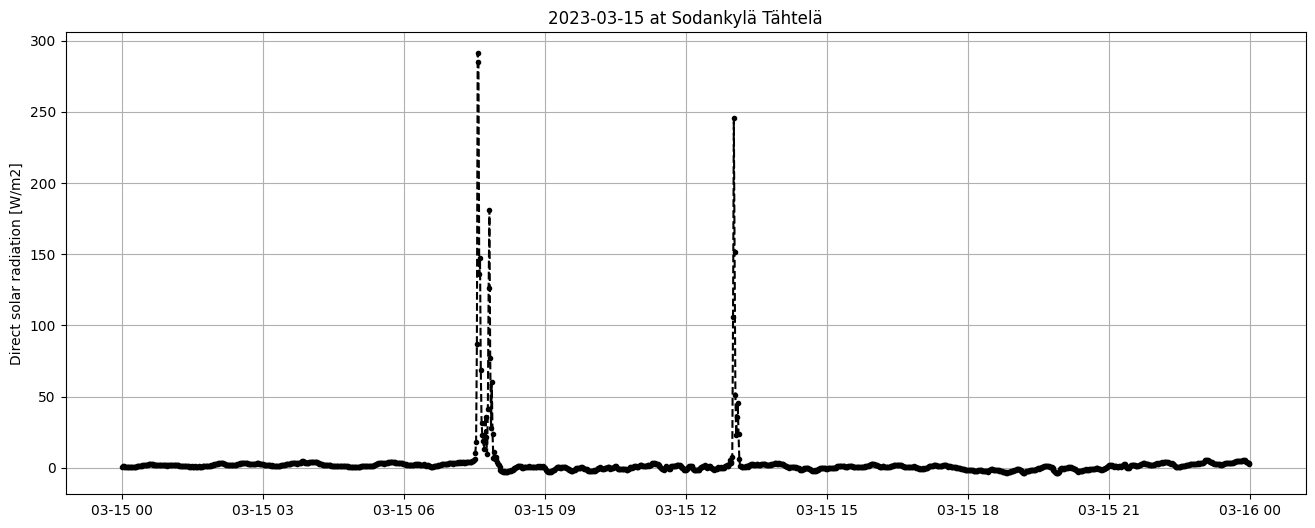

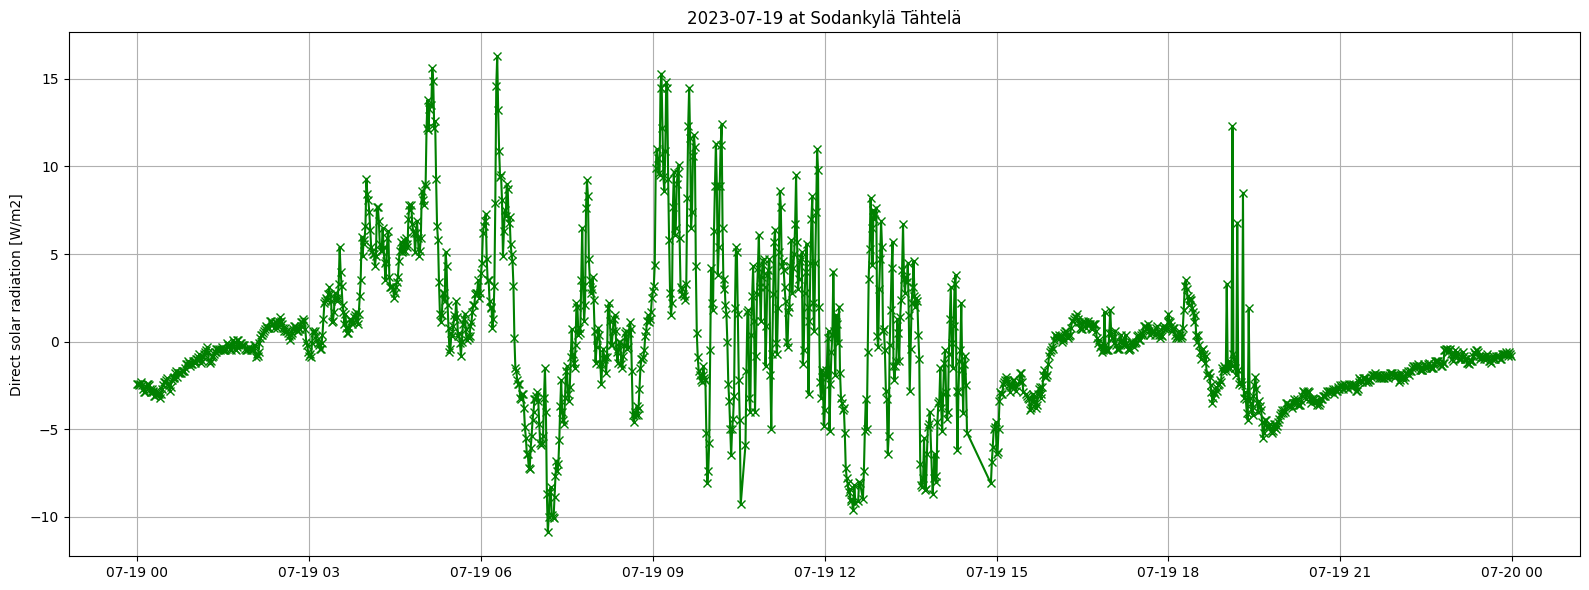

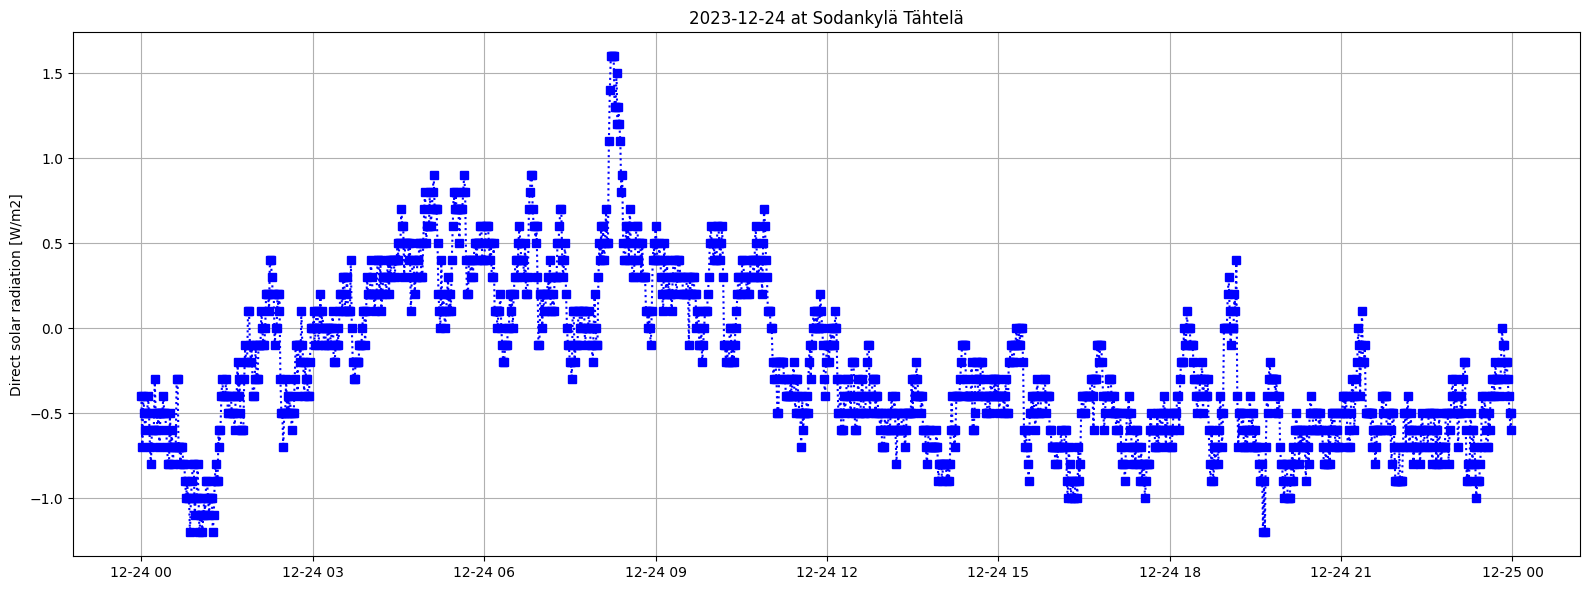

In [53]:
#First day of radiation
day_1 = '2023-03-15 at Sodankylä Tähtelä'
#Second day of radiation
day_2 = '2023-07-19 at Sodankylä Tähtelä'
#Third day of radiation
day_3 = '2023-12-24 at Sodankylä Tähtelä'

#Plotting first radiation in March
plt.figure(figsize=(16,6)) 
plt.plot(radiation_1["Direct solar radiation [W/m2]"],color='black', marker='.',linestyle='--') 
plt.title(day_1) 
plt.ylabel("Direct solar radiation [W/m2]") 
plt.grid(True) 
plt.show() 

#Plotting second radiation in July
plt.figure(figsize=(16,6)) 
plt.plot(radiation_2["Direct solar radiation [W/m2]"],color='green', marker='x',linestyle='-') 
plt.title(day_2) 
plt.ylabel("Direct solar radiation [W/m2]") 
plt.grid(True) 
plt.tight_layout()
plt.show() 

#Plotting third radiation in December
plt.figure(figsize=(16,6)) 
plt.plot(radiation_3["Direct solar radiation [W/m2]"],color='blue', marker='s',linestyle=':') 
plt.title(day_3) 
plt.ylabel("Direct solar radiation [W/m2]") 
plt.tight_layout()
plt.grid(True) 
plt.show() 

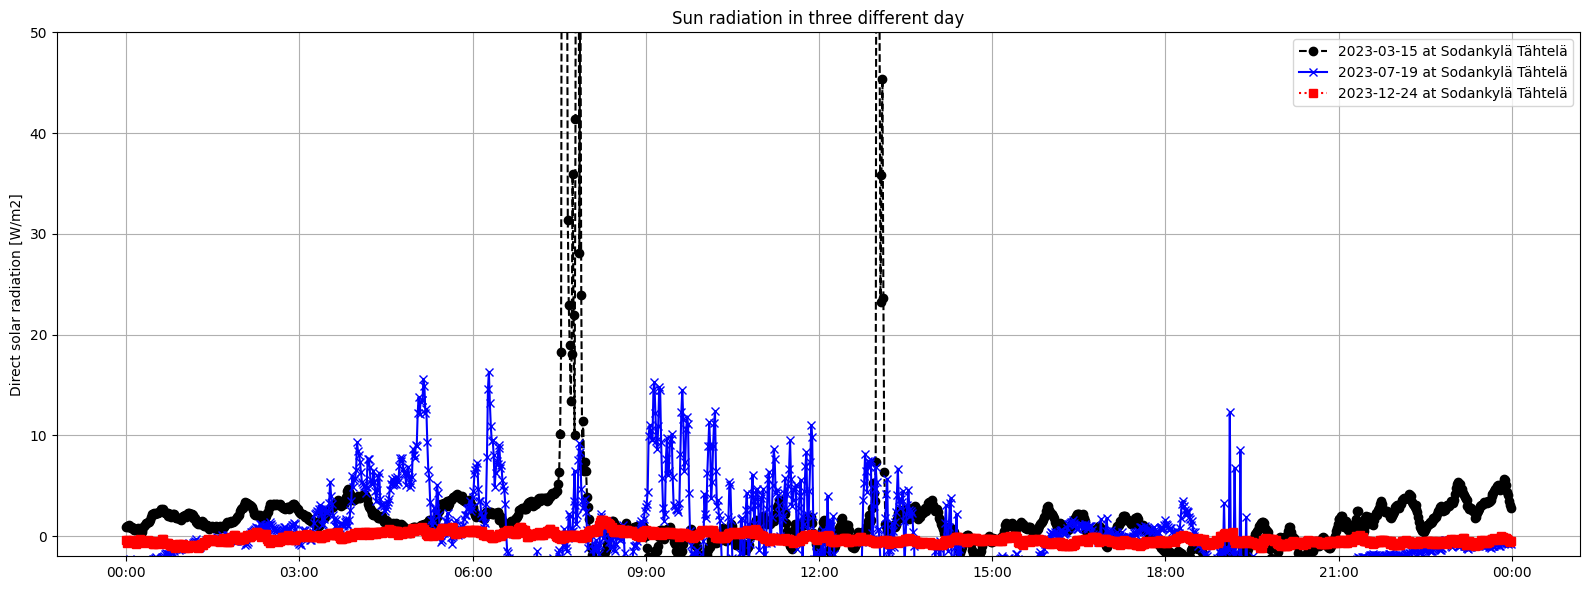

In [52]:
#Lets plotting all radiation in one figure.


delta1 = radiation_1.index[0].date() - radiation_2.index[0].date()

delta2 = radiation_1.index[0].date() - radiation_3.index[0].date()

fig, ax = plt.subplots(1, figsize=(16,6 ))

plt.plot(radiation_1.index, radiation_1.values, label=day_1, color='black',
         marker='o', linestyle='--')
plt.plot(radiation_2.index + pd.offsets.Day(delta1.days), radiation_2.values,
         label=day_2, color='blue', marker='x', linestyle='-')
plt.plot(radiation_3.index + pd.offsets.Day(delta2.days), radiation_3.values,
         label=day_3, color='red', marker='s', linestyle=':')

plt.legend()
plt.ylim([-2, 50])
plt.title('Sun radiation in three different day')
plt.ylabel("Direct solar radiation [W/m2]")
plt.grid(True)
plt.tight_layout()
xfmt = mdates.DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(xfmt)

plt.show()

Answer: As we can see from the figure above, the sun radiation was high as 300[W/m2] at 8 in March which indicates the sky being clear. It is a reason why it had a peak.  In December it has really low direct radiations which means that sun did not rise at all. In July it had something direct sun radiation between -1 to 16. It indicates that there was partly cloudy day. 

**(4) Read the text [What Does the Metaverse Mean for the Future of Energy Consumption?](https://earth.org/metaverse-energy-consumption/). Write a brief analysis of the text based on the relation between data, energy and level of processes. From the energy perspective, is it possible to maintain this kind of technologies? Note: This is clearly not a right/wrong question, but a space to critically think about current issues related to the course.**

Answer: 
The text explores the potential environmental impact of the Metaverse, a virtual world relying on artificial intelligence and virtual reality technologies. The primary concern raised is the substantial energy consumption associated with the processing demands of AI and VR. The text highlights Meta's commitment to zero-net emissions by 2030, with initiatives such as a wind farm and increased use of renewable energy.

In energy perspective, the computing infrastructure needs to be 1000 times more powerful to sustain the Metaverse, which means that it uses much more energy and increase the carbon footprint. So if we want to sustain the environment while using the Metaverse, we need to find innovative solutions to reduce the energy consumption e.g. better power-efficient hardware with new algorithms and software improvements. However, Metaverse uses 100% renewable energy to reduce the harm for the environment.